# AI-Driven Stock Market Rebound Analysis System
## Import Data

In [96]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import json

project_root = os.path.dirname('/home/strick/ai-driven-stock-market-rebound-analysis-system/')
sys.path.append(project_root)

from config import RAW_DATA_DIR

In [97]:
def load_stock_data(stock_symbol):
    daily_file_path = os.path.join(RAW_DATA_DIR, f"{stock_symbol}_daily.json")
    monthly_file_path = os.path.join(RAW_DATA_DIR, f"{stock_symbol}_monthly.json")

    with open(daily_file_path, 'r') as file:
        daily_data = json.load(file)

    with open(monthly_file_path, 'r') as file:
        monthly_data = json.load(file)

    return {'daily': daily_data, 'monthly': monthly_data}

In [98]:
d = load_stock_data('IFRX')

FileNotFoundError: [Errno 2] No such file or directory: '~/ai-driven-stock-market-rebound-analysis-system/data/raw/IFRX_daily.json'

In [37]:
print(d)

{'daily': {'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'IFRX', '3. Last Refreshed': '2024-01-29', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-01-29': {'1. open': '1.5600', '2. high': '1.7400', '3. low': '1.5600', '4. close': '1.7200', '5. volume': '118745'}, '2024-01-26': {'1. open': '1.5300', '2. high': '1.6200', '3. low': '1.4500', '4. close': '1.5400', '5. volume': '129008'}, '2024-01-25': {'1. open': '1.6800', '2. high': '1.6800', '3. low': '1.5000', '4. close': '1.5000', '5. volume': '195324'}, '2024-01-24': {'1. open': '1.7100', '2. high': '1.7567', '3. low': '1.6000', '4. close': '1.6000', '5. volume': '151095'}, '2024-01-23': {'1. open': '1.6500', '2. high': '1.7600', '3. low': '1.6500', '4. close': '1.7200', '5. volume': '128434'}, '2024-01-22': {'1. open': '1.6000', '2. high': '1.6650', '3. low': '1.6000', '4. close': '1.6500', '5. volume': '41594'}, '2024-01-19': {'1. open': '

In [60]:
def get_daily_df(daily_data):    
    # Assuming 'Time Series (Daily)' is the key containing the daily stock data
    data = daily_data['Time Series (Daily)']
    df = pd.DataFrame(data).T  # Transpose to get dates as rows
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df.index = pd.to_datetime(df.index)  # Convert the index to datetime
    # Convert data to numeric
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df.dropna(inplace=True)  # or you can fill missing values using df.fillna(method='ffill')

    return df

def get_monthly_df(monthly_data):
    data = monthly_data['Monthly Time Series']
    df = pd.DataFrame(data).T  # Transpose to get dates as rows
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df.index = pd.to_datetime(df.index)  # Convert the index to datetime
    # Convert data to numeric
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df.dropna(inplace=True)  # or you can fill missing values using df.fillna(method='ffill')

    return df

def basic_visual(df):
    # Basic Line Chart for Closing Prices
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Closing Price')
    plt.title('Closing Price of IFRX Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def advanced_visual(df):
    
    df_sorted = df.sort_index(ascending=True)
    
    mpf.plot(df_sorted, type='candle', style='charles',
         title='IFRX Stock Price',
         ylabel='Price ($)')


In [51]:
daily_df = get_daily_df(d['daily'])
monthly_df = get_monthly_df(d['monthly'])


## Basic Visualization

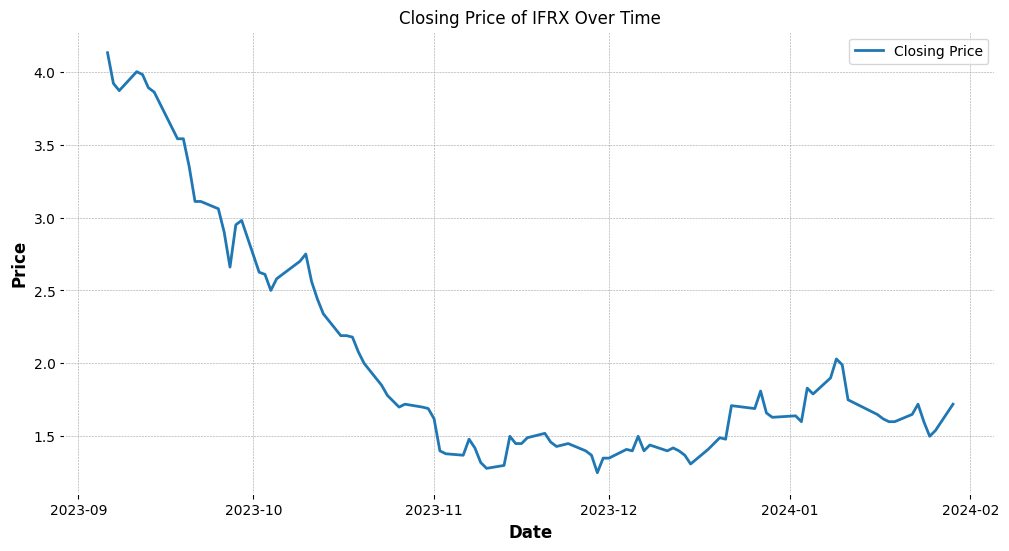

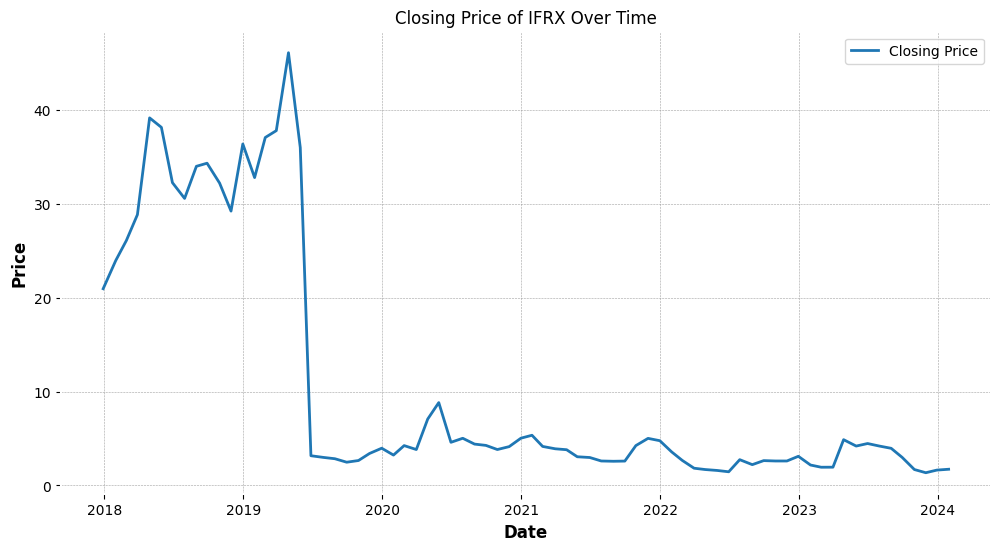

In [56]:

basic_visual(daily_df)
basic_visual(monthly_df)

## Advance Visual

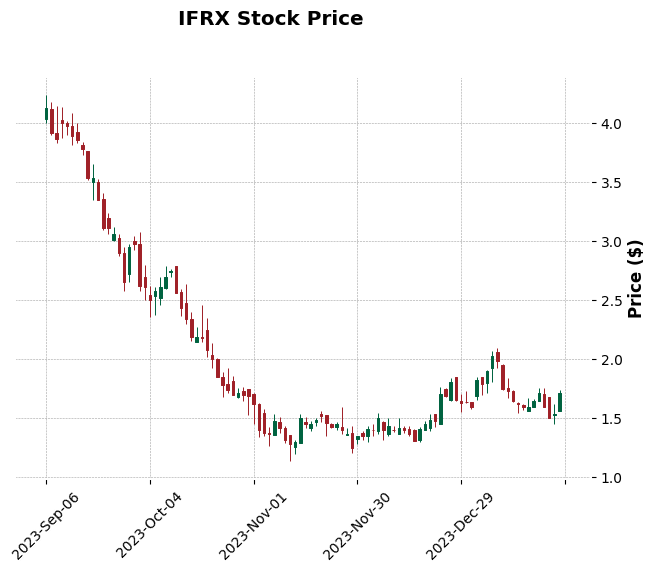

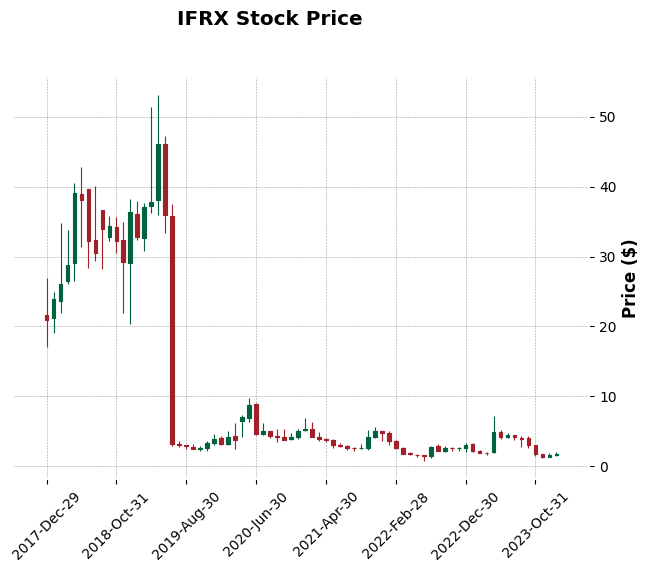

In [61]:
advanced_visual(daily_df)
advanced_visual(monthly_df)